In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Digital Nest/Logistic Regression")
print (os.getcwd())

C:\Digital Nest\Logistic Regression


In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(np.unique(iris.Species,return_counts=True))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50], dtype=int64))


In [4]:
# convert target variable into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
species = le.fit_transform(iris.Species)
print(type(species))
print(np.unique(species,return_counts=True))

<class 'numpy.ndarray'>
(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


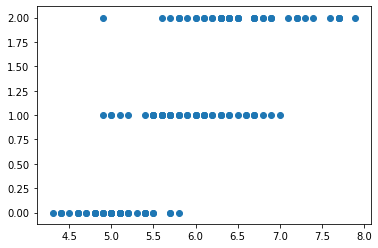

In [5]:
# SepalLength vs species
plt.scatter(iris.SepalLength,species)
plt.show()

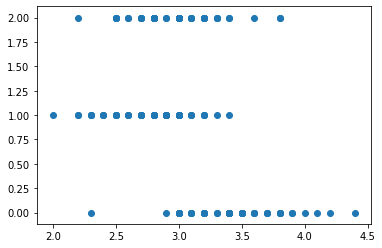

In [6]:
plt.scatter(iris.SepalWidth,species)
plt.show()

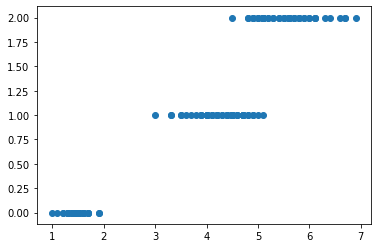

In [7]:
plt.scatter(iris.PetalLength,species)
plt.show()

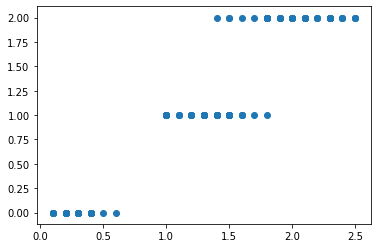

In [8]:
plt.scatter(iris.PetalWidth,species)
plt.show()

In [9]:
# split the file into Independent and dependent variables
irisX = iris.copy()
irisX.drop(axis=1,columns=["Species"],inplace=True)
print(irisX.head())
irisY = pd.DataFrame(iris,columns=["Species"])

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


In [10]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3)
DTC.fit(irisX,irisY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
print(DTC.feature_importances_)

[0.         0.         0.05393633 0.94606367]


[Text(125.55000000000001, 190.26, 'node #0\nPetalWidth <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = y[0]'),
 Text(83.7, 135.9, 'node #1\ngini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = y[0]'),
 Text(167.4, 135.9, 'node #2\nPetalWidth <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = y[1]'),
 Text(83.7, 81.53999999999999, 'node #3\nPetalLength <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = y[1]'),
 Text(41.85, 27.180000000000007, 'node #4\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = y[1]'),
 Text(125.55000000000001, 27.180000000000007, 'node #5\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = y[2]'),
 Text(251.10000000000002, 81.53999999999999, 'node #6\nPetalLength <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = y[2]'),
 Text(209.25, 27.180000000000007, 'node #7\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = y[2]'),
 Text(292.95, 27.180000000000007, 'node #8\ngini = 0.0\nsamples = 43

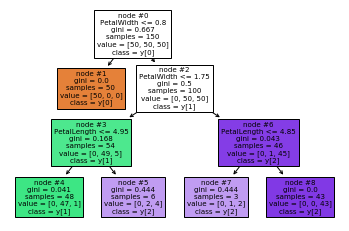

In [12]:
from sklearn import tree
tree.plot_tree(decision_tree = DTC,
               feature_names = irisX.columns.values,
               class_names = True,
               filled=True,
               node_ids=True,
               proportion=False)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


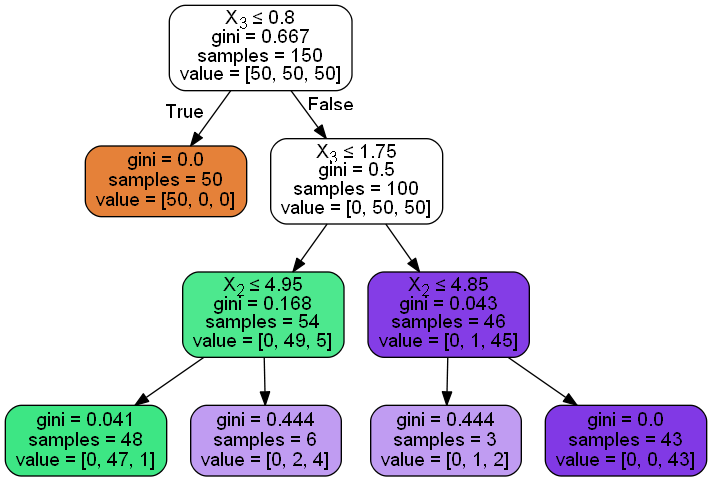

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
DTC.apply(irisX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 7, 8, 8, 5, 8, 8,
       8, 5, 5, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

In [15]:
irisx1 = irisX.loc[50:50:,::]
print(irisx1)
path = DTC.decision_path(irisx1)
print(path)

    SepalLength  SepalWidth  PetalLength  PetalWidth
50          7.0         3.2          4.7         1.4
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1


In [17]:
print(dot_data)

In [20]:
type(dot_data.getvalue())

str

In [31]:
str1 =dot_data.getvalue()
print(str1)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>3</SUB> &le; 0.8<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]>, fillcolor="#ffffff"] ;
1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]>, fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<X<SUB>2</SUB> &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]>, fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label=<gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]>, fillcolor="#3de684"] ;
3 -> 4 ;
5 [label=<gini = 0.444<br/>samples = 6<br/>value = [0, 2, 4]>, fillcolor="#c09cf2"] ;
3 -> 5 ;
6 [label=<X<SUB>2</SUB> &le; 4.85<br/>gini = 0.043<br/>samples = 46<br/>value = [0, 1, 45]>, fillcolor="#843de6"] ;

In [27]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>3</SUB> &le; 0.8<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]>, fillcolor="#ffffff"] ;\n1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>3</SUB> &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]>, fillcolor="#ffffff"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<X<SUB>2</SUB> &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]>, fillcolor="#4de88e"] ;\n2 -> 3 ;\n4 [label=<gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]>, fillcolor="#3de684"] ;\n3 -> 4 ;\n5 [label=<gini = 0.444<br/>samples = 6<br/>value = [0, 2, 4]>, fillcolor="#c09cf2"] ;\n3 -> 5 ;\n6 [label=<X<SUB>2</SUB> &le; 4.85<br/>gini = 0.043<br/>samples = 46<br/>value = [0, 1, 45]>, fillcol